In [24]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [1]:
import copy
from datetime import datetime
import json
import numpy as np
import os
from pathlib import Path
from typing import Any, Dict, List, Tuple, Union

import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = False

import ase
import ase.io as ase_io
from ase import Atoms
from ase.visualize import view

#import warnings
#warnings.filterwarnings("ignore")
#warnings.filterwarnings("ignore", module = "matplotlib\..*" )

In [2]:
os.chdir(os.path.split(os.getcwd())[0]) # set working directory to Molli top level

import ase_utils as au
import constants as C
from dataset import Dataset
import datasets_collections as dc
import features as ft
import features_collections as fc
import utils as ut
import xyz_parser
import molecule_analyzer as A

In [31]:
dset = dc.mol24_crest_conformers
#dset = dc.mol24_xtb_gfn2_opt_steps

dataset_description = dset.description
molecules = au.create_ase_atoms_list_from_dataset(dset)
molecules_names = [x.info["name"] for x in molecules]

features_list = fc.mol24_forbidden_bonds
features_info = [x.get_info(molecules[0]) for x in features_list]

calc_by_features = A.calculate_values_groupby_features(
                                      molecules=molecules,
                                      features_list=features_list
                                      )

calc_by_mols = A.calculate_values_groupby_molecules(
                                      molecules=molecules,
                                      features_list=features_list
                                      )


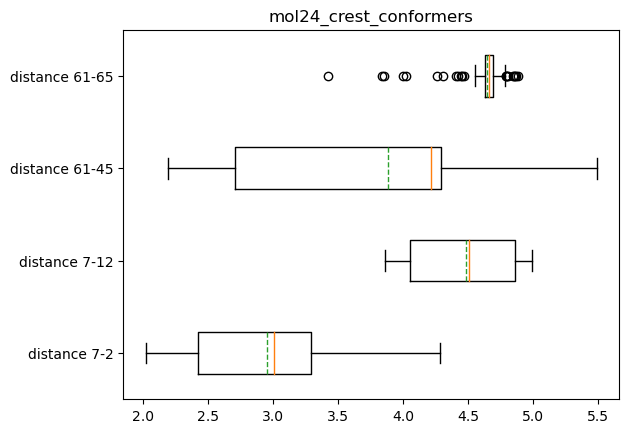

In [24]:
data = [x.values for x in calc_by_features]
labels = [x.name for x in calc_by_features]
user_medians = [np.mean(x) for x in data]

plt.title(dataset_description)
plt.boxplot(
              data,
              labels=labels,
              showmeans=True,
              meanline=True,
              vert=False,
              #usermedians=user_medians,
            );


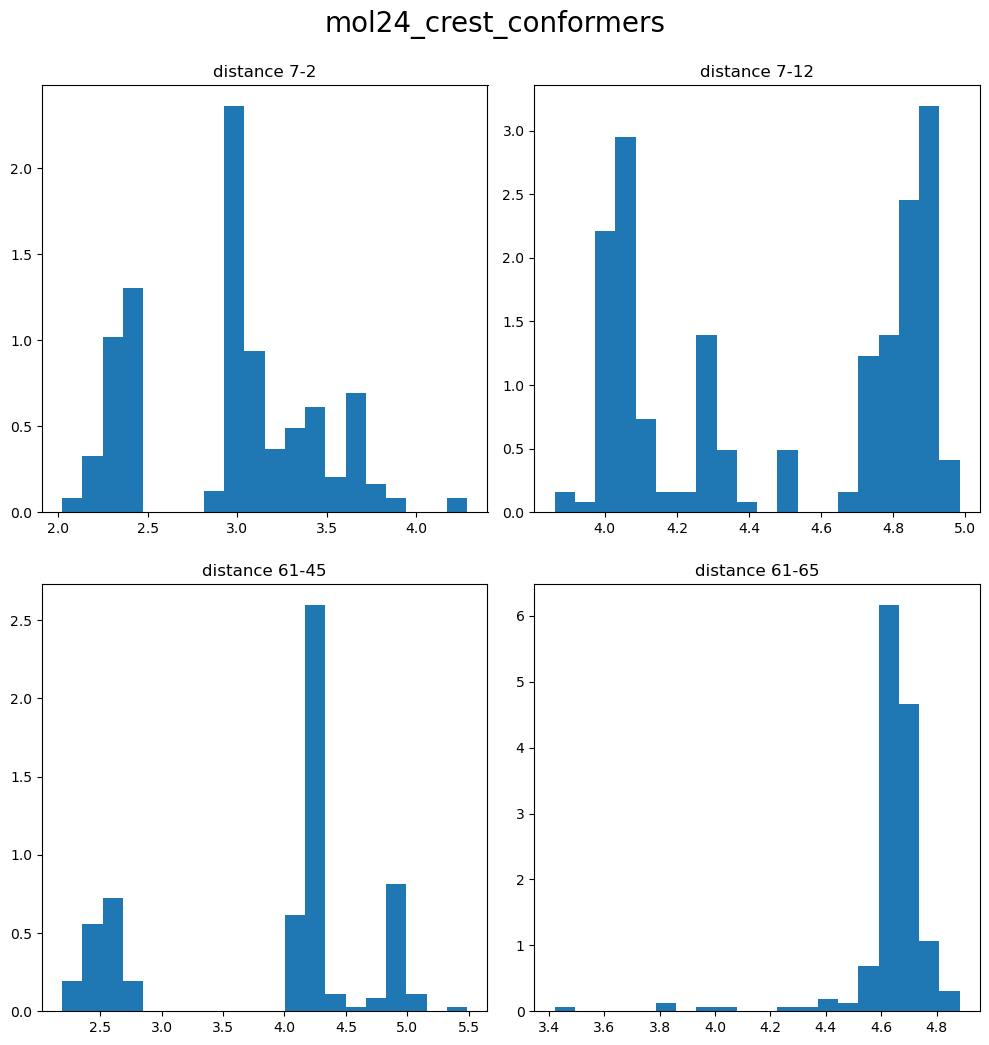

In [25]:
# https://www.kaggle.com/code/ambrosm/msci-eda-which-makes-sense
#_, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))

n = len(calc_by_features)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (10, 10)
num_bins = 20
title = dataset_description

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
for data, ax in zip(calc_by_features, axs.ravel()):
    ax.hist(data.values, bins=num_bins, density=True)
    ax.set_title(data.name)
plt.tight_layout(h_pad=2)
plt.suptitle(title, fontsize=20, y=1.04)
plt.show()


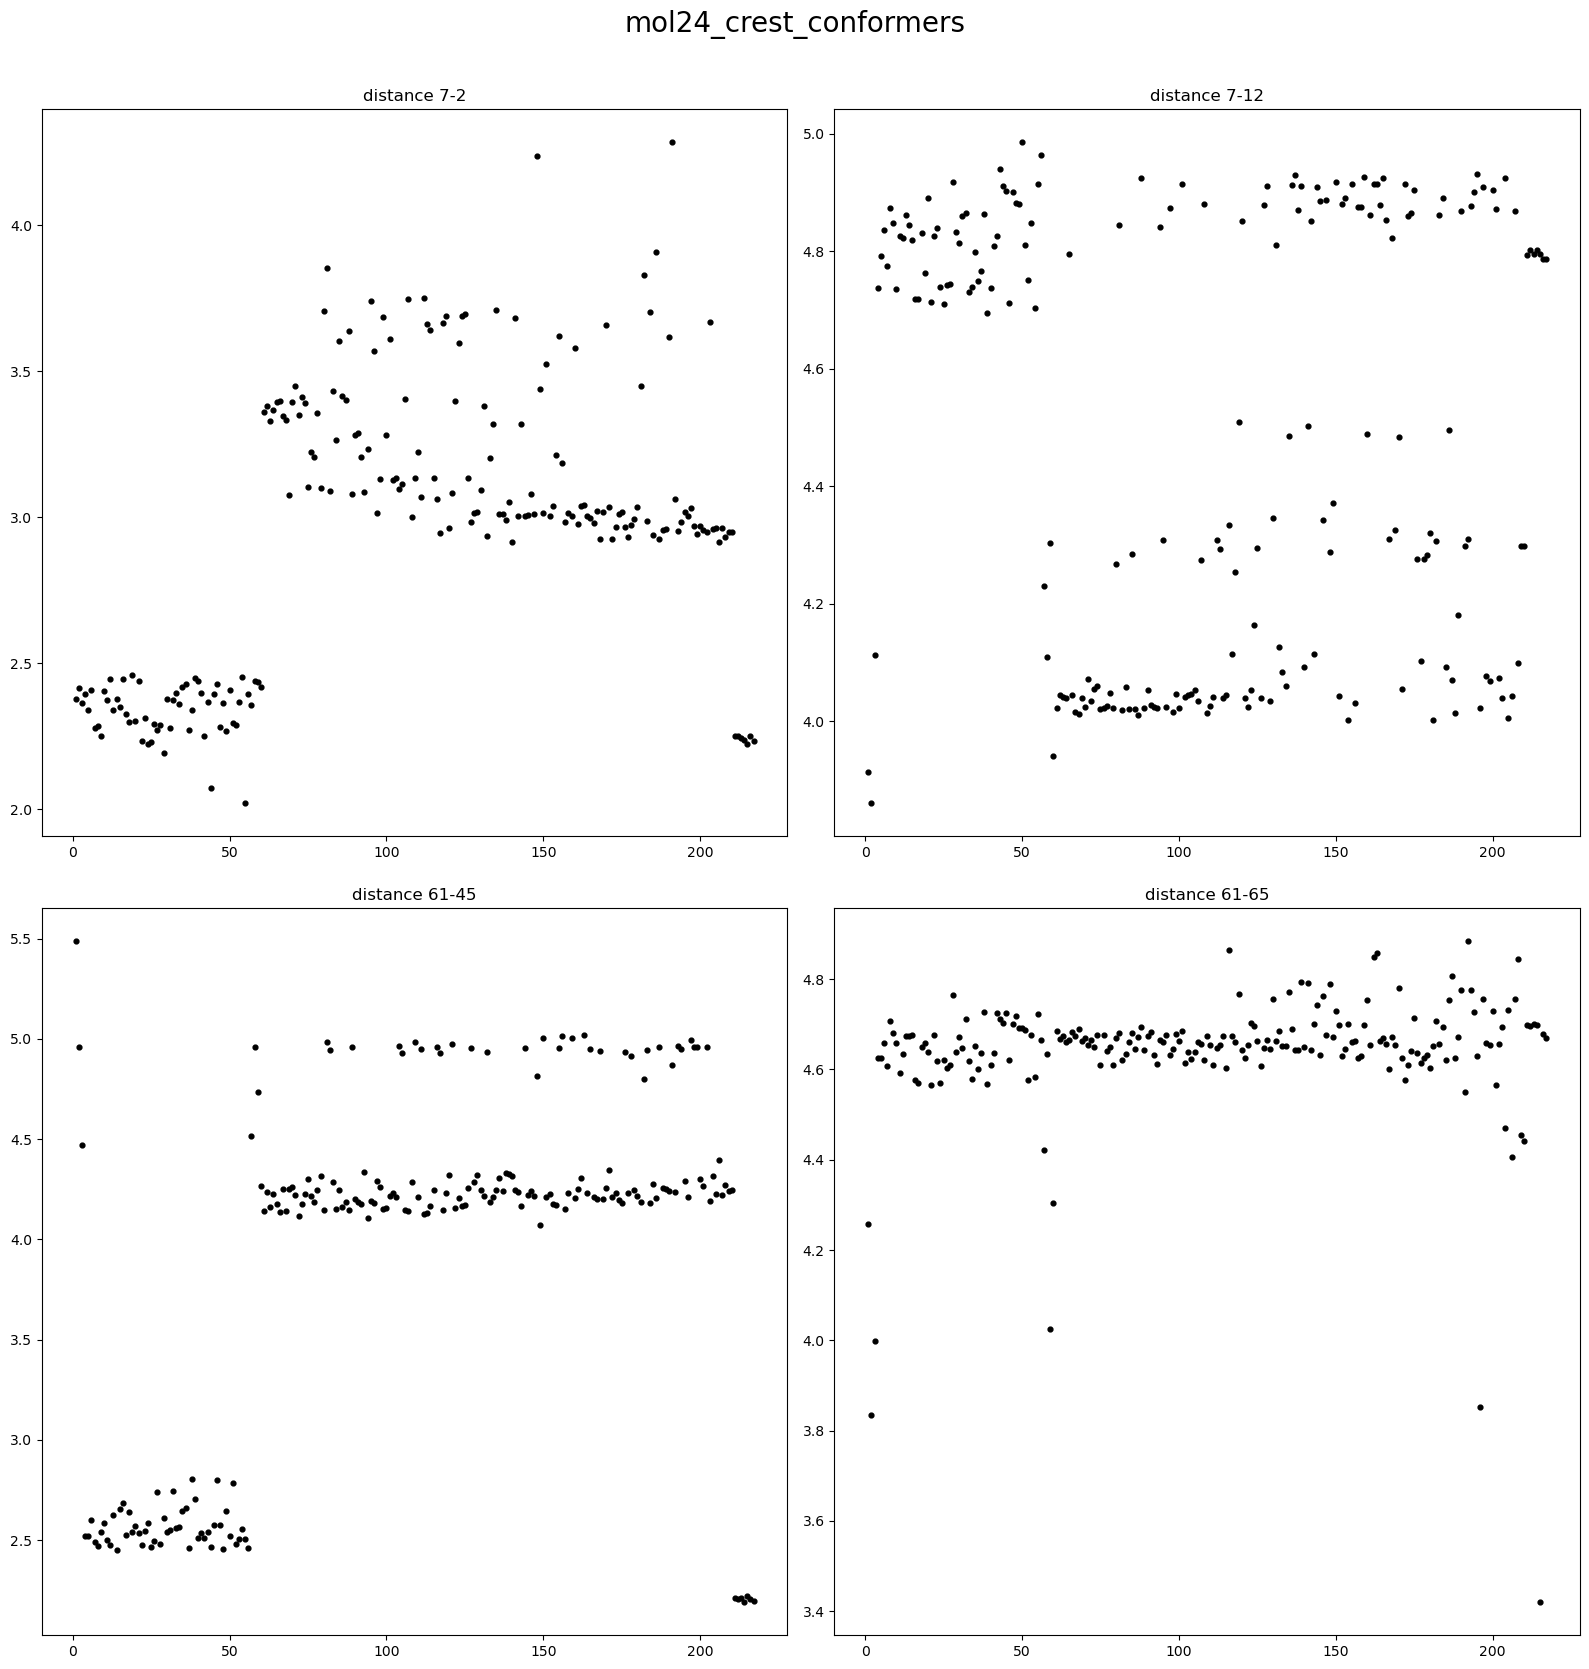

In [27]:
title = dataset_description

_, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
for data, ax in zip(calc_by_features, axs.ravel()):
    ax.scatter([i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c='black')
    ax.set_title(data.name)
plt.tight_layout(h_pad=2)
plt.suptitle(title, fontsize=20, y=1.04)
plt.show()


In [30]:
dset.names

['mol24_ex5_gfnff_crest_conformers',
 'mol24_ex8_gfn2_crest_conformers',
 'mol24_ex10_gfnff_crest_conformers',
 'mol24_ex15_gfnff_crest_conformers',
 'mol24_ex16_gfn2_crest_conformers']

In [34]:
molecules_names[50:]

['mol24_ex8_gfn2_crest_conformers_48',
 'mol24_ex8_gfn2_crest_conformers_49',
 'mol24_ex8_gfn2_crest_conformers_50',
 'mol24_ex8_gfn2_crest_conformers_51',
 'mol24_ex8_gfn2_crest_conformers_52',
 'mol24_ex8_gfn2_crest_conformers_53',
 'mol24_ex10_gfnff_crest_conformers_1',
 'mol24_ex10_gfnff_crest_conformers_2',
 'mol24_ex10_gfnff_crest_conformers_3',
 'mol24_ex10_gfnff_crest_conformers_4',
 'mol24_ex15_gfnff_crest_conformers_1',
 'mol24_ex15_gfnff_crest_conformers_2',
 'mol24_ex15_gfnff_crest_conformers_3',
 'mol24_ex15_gfnff_crest_conformers_4',
 'mol24_ex15_gfnff_crest_conformers_5',
 'mol24_ex15_gfnff_crest_conformers_6',
 'mol24_ex15_gfnff_crest_conformers_7',
 'mol24_ex15_gfnff_crest_conformers_8',
 'mol24_ex15_gfnff_crest_conformers_9',
 'mol24_ex15_gfnff_crest_conformers_10',
 'mol24_ex15_gfnff_crest_conformers_11',
 'mol24_ex15_gfnff_crest_conformers_12',
 'mol24_ex15_gfnff_crest_conformers_13',
 'mol24_ex15_gfnff_crest_conformers_14',
 'mol24_ex15_gfnff_crest_conformers_15',


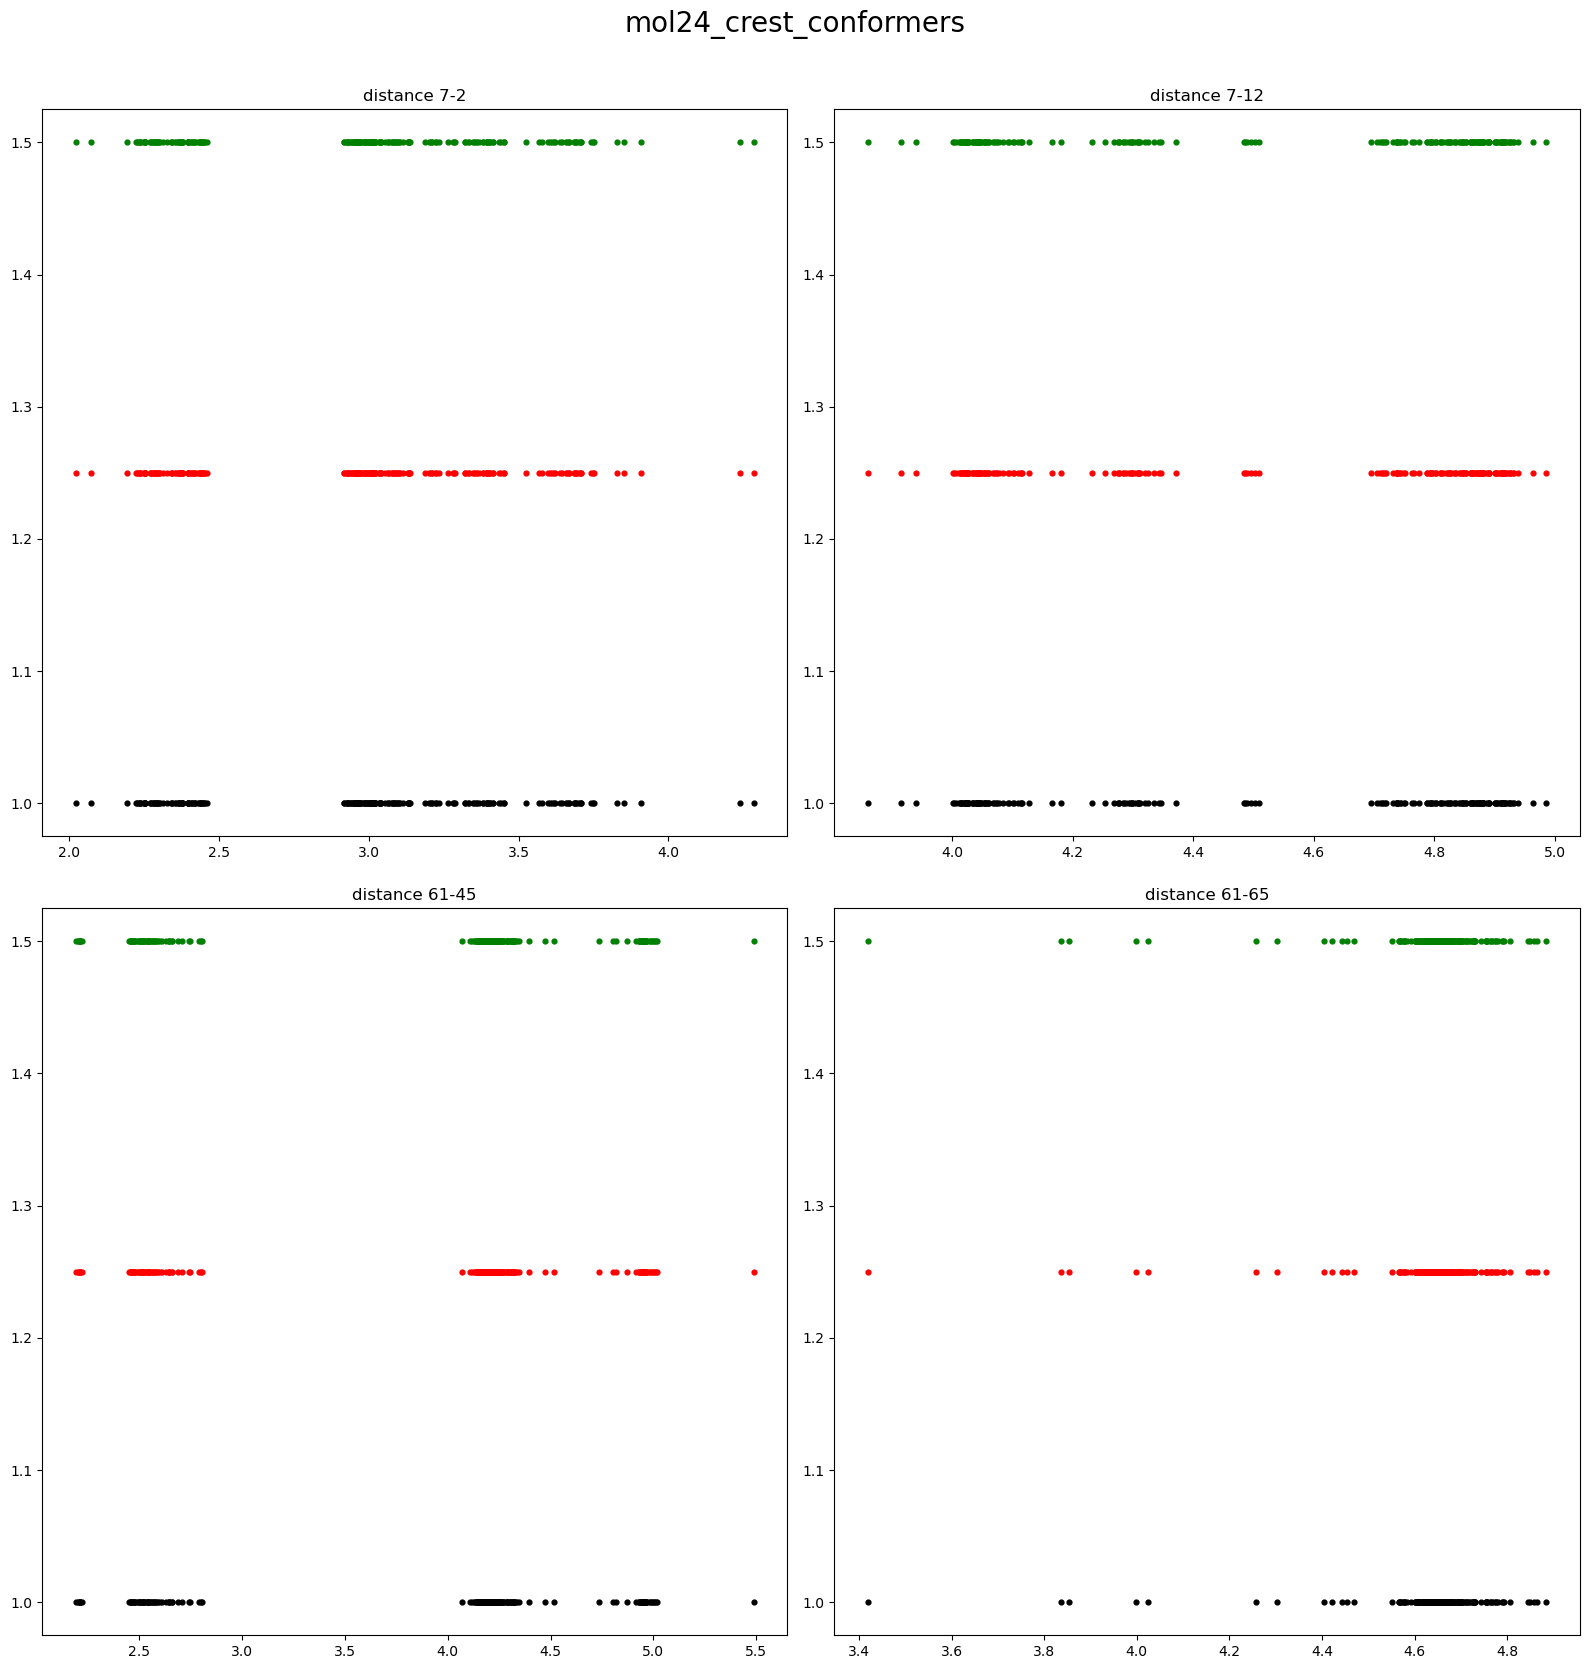

In [29]:
title = dataset_description

_, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
for data, ax in zip(calc_by_features, axs.ravel()):
    ax.scatter(data.values, [1 for _ in data.values], s=12, c='black')
    ax.scatter(data.values, [2 for _ in data.values], s=12, c='red')
    ax.scatter(data.values, [3 for _ in data.values], s=12, c='green')
    ax.set_title(data.name)
plt.tight_layout(h_pad=2)
plt.suptitle(title, fontsize=20, y=1.04)
plt.show()
